<a href="https://colab.research.google.com/github/vivivicdjdk/machine/blob/main/7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#인공신경망

MNIST: 딥러닝을 배울 때 많이 사용하는 데이터셋

손으로 쓴 0~9의 숫자로 이루어짐

패션MINTS는 숫자 대신 패션 아이템으로 이루어진 데이터

여기서는 텐서플로(tensorflow)를 사용해서 데이터를 불러옴

In [1]:
from tensorflow import keras
# keras.datasets.fashion_mnist 모듈 아래 load_data()함수는 훈련 데이터와 테스트 데이터를 나누어 반환
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape) # 60000개의 이미지. 28 X 28 크기

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


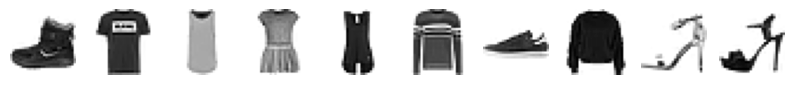

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])
# 0=티셔츠, 1=바지, 2=스웨터, 3=드레스, 4=코트, 5=샌달, 6=셔츠, 7=스니커즈, 8=가방, 9=앵클부츠

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


레이블당 샘플 개수 확인

In [6]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


**로지스트 회귀를 이용한 분류**

훈련 샘플이 많기 때문에 전체 데이터를 한번에 사용하는 것보다는 샘플을 하나씩 사용하는 것이 더 효율적으로 보임

확률적 경사 하강법을 이용

확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동

따라서 특성마다 값의 범위가 일정해야함

패션 MNIST의 경우 각 픽셀은 0~255의 값을 가짐

이런 이미지의 경우 보통 255로 나누어 0~1로 정규화

표준화는 아니지만 양수 값으로 이루어진 이미지를 전처리할 때 널리 사용하는 방법

정규화와 표준화의 차이점

**정규화(Nomalization)**
* 값의 범위를 0~1사이의 값으로 변환
* scikit-learn에서 MinMaxScaler 사용

**표준화(Standardization)**
* 값의 범위를 평균 0, 분산 1이 되도록 변환
* 정규분포를 표준정규분포로 변환하는 것과 같음
* scikit-learn에서 StandardScaler 사용

**공통점**
* 학습 전에 데이터를 scaling 함
  * 머신러닝에서 스케일이 큰 특성의 영향력이 강해지는 것을 방지
  * 딥러닝에서 Local Minima에 빠질 위험을 감소하고 학습 속도 향상

In [7]:
train_scaled = train_input /255.0
train_scaled = train_scaled.reshape(-1, 28*28) # SGDClassifier는 2차원 입력을 다루지 못하기 때문에 각 샘플을 1차원 배열로 바꿈
print(train_scaled.shape)

(60000, 784)


In [8]:
# 최대값, 최소값 모를 때
# 정규화 함수 사용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_input.reshape(-1, 28*28))
# print(scaler.data_max_)
# print(scaler.data_min_)
##train_scaled1 = scaler1 = scaler.transform(train_input.reshape(-1, 28*28))
train_scaled1 = scaler.transform(train_input.reshape(-1,28*28))
test_scaled1 = scaler.transform(test_input.reshape(-1, 28*28))
print(train_scaled1.shape)

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


**인공신경망**

확률적 경사 하강법을 사용하는 로지스틱 회귀와 비슷

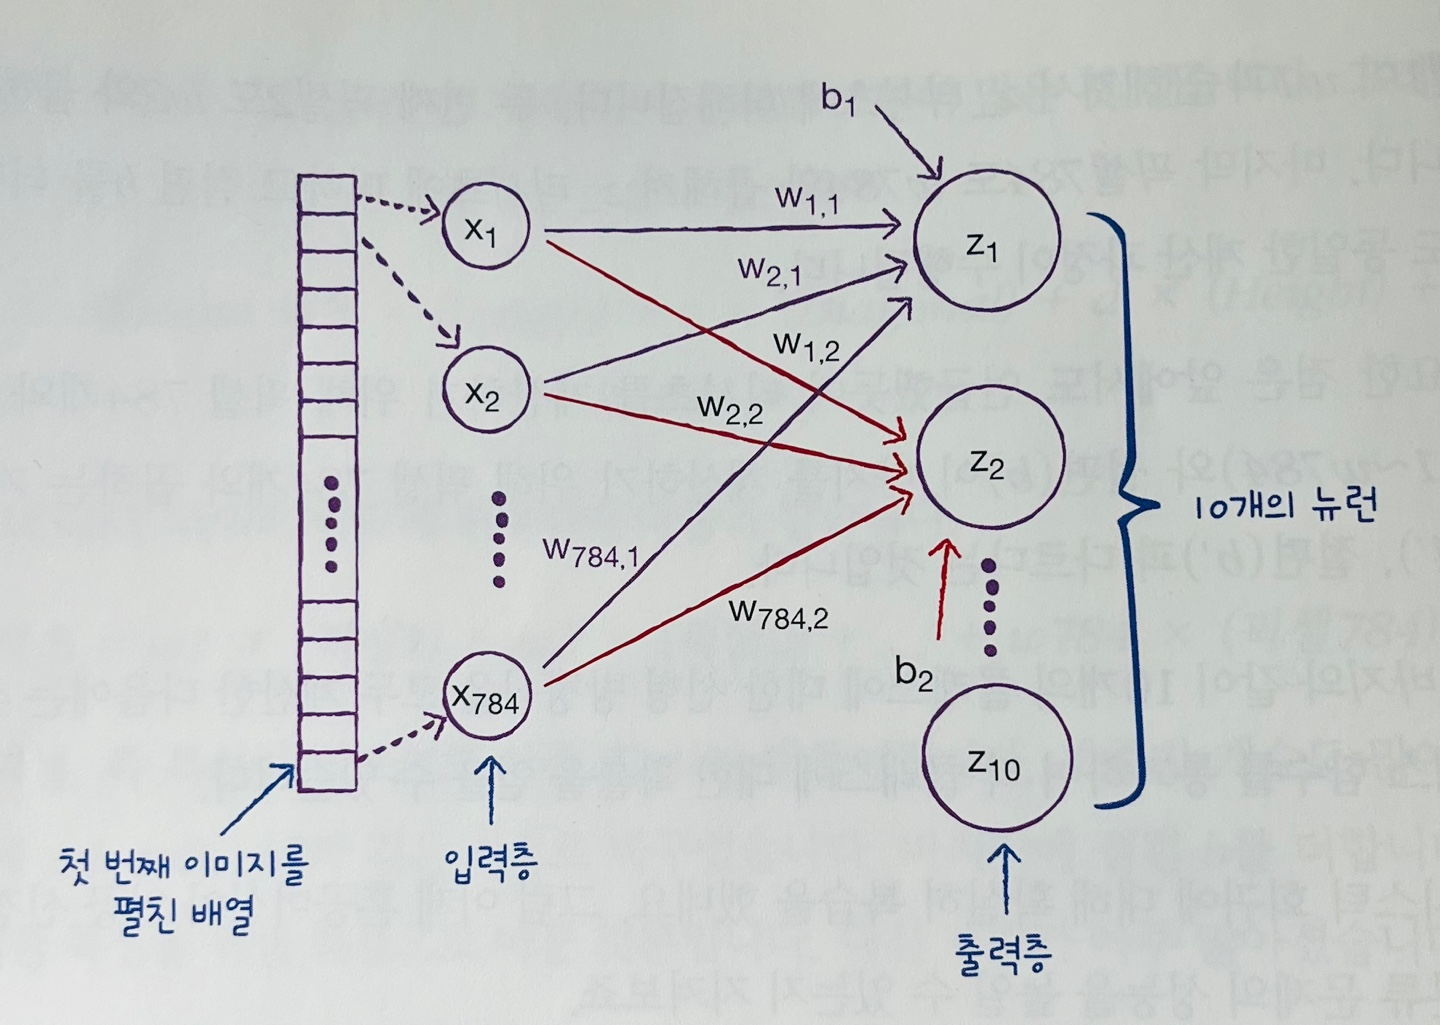

클래스가 총 10개이므로 z10까지 계산
 z1~z10을 계산것을 바탕으로 클래스를 예측하기 때문에 신경망의 최종 값을 만든다는 의미에서 **출력층(output layer)**이라고 부름

 **입력층** x1~x784. 픽셀값 자체이고 특별한 계산 수행 x

 **가중치** z1을 만들기 위해 픽셀1인 x1에 곱해지는 W1,1

 **절편** 뉴런마다 하나씩 존재 b1

**텐서플로(tensorflow)와 케라스(keras)**

인기있는 딥러닝 라이브러리

그래픽 처리 장치 gpu를 사용

gpu는 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 곱셈과 덧셈이 많이 수행되는 인공 신경망에 큰 도움이 됨

In [10]:
import tensorflow as tf
from tensorflow import keras

**인공신경망으로 모델 만들기**

로지스틱 회귀에서는 교차검증을 사용해 모델 평가

인공 신경망에서는 검증 세트를 별도로 덜어내서 사용

1. 딥러닝 분야 의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적

2. 교차 검증을 수행하기에는 훈련 시간이 오래 걸림

정규화는 이미 앞에서 했으므로 넘어감

In [11]:
from sklearn.model_selection import train_test_split
# 데이터 셋 나누기(검증세트 생성)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

**출력층 생성**

클래스개 10이므로 출력도 10개


**밀집층(dense layer)**

784개의 픽셀과 10개의 뉴런이 **모두** 연결된 선을 생각하면 7840개의 연결된 선이 존재하며 이는 매우 빽뺵하게 밀집되어 보임

이런 층을 양쪽의 뉴런이 모두 연결하므로 **완전 연결층(fully connected layer)**이라 부름

In [12]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
                              # 다중 분류. 만약 이진분류라면 sigmoid

keras.layer.Dense(뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기)
* 첫 번째 매개변수인 뉴런 개수는 10개의 클래스(패션 아이템)를 분류하므로 10을 지정
* 두 번째 매개변수는 **활성화 함수(activation function)**를 지정함
  * **뉴런의 선형 방정식 계산 결과에 적용되는 함수(a)**
  * 지정하지 않으면 뉴런의 선형 방정식 계산 결과가 출력
  * 여기서는 뉴런의 출력에 적용할 함수로 소프트맥스 함수를 사용함(다중분류이기 때문)
  * 소프트맥스 함수는 뉴런에서 출력되는 값을 확률로 바꾸기 위해 사용됨
  * 케라스 층(케라스의 밀집층)에서는 activation 매개변수에 소프트맥스 함수를 지정함
  * 만약 2개의 클래스를 분류하는 이진 분류라면 시그모이드 함수를 사용하므로 activation='sigmoid'를 지정함
  * 회귀모델인 경우에는 활성화 함수를 적용할 필요가 없음
* 세 번째 매개변수는 입력값의 크기. 10개의 뉴런이 각각 몇 개의 입력을 받는지 튜플로 지정
  * 784개의 원소로 이루어진 1차원 배열

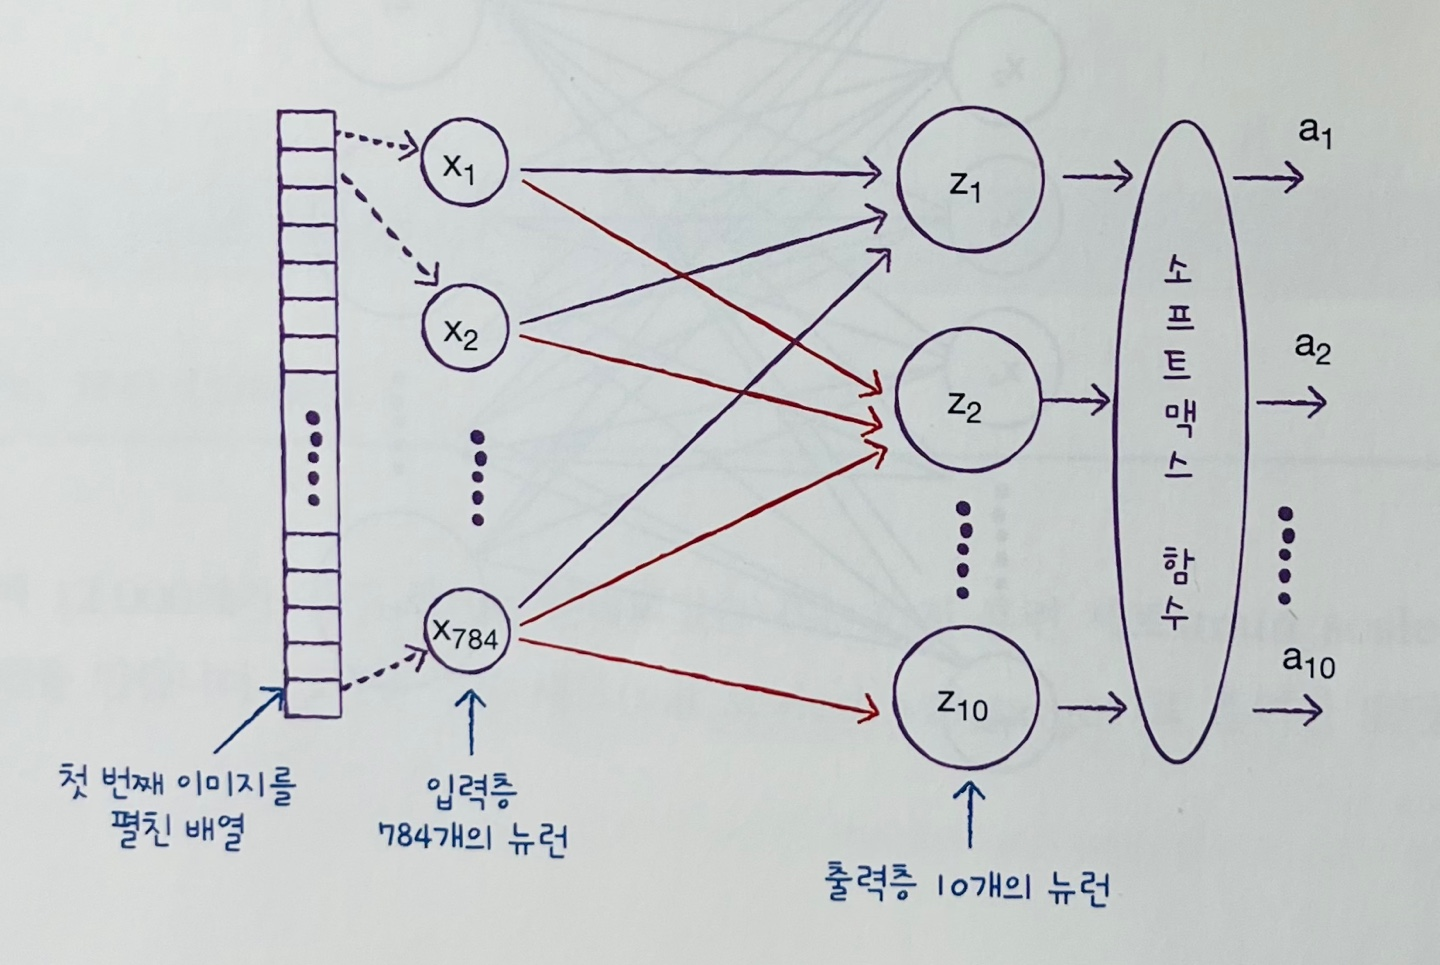

**밀집층을 가진 신경망 모델 만들기**

여기서는 출력층 하나만으로 구성됨(앞에서 만든 밀집층의 객체 dense 전달)

In [13]:
model = keras.Sequential(dense)

**케라스 모델 설정**

모델 훈련하기 전 설정 단계

model객체의 compile()메서드에서 수행

(손실 함수 종류(필수), 훈련 과정에서 계산하고싶은 측정값)

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

**손실(loss) 함수**(4-2에 설명)

* 이진 분류: loss='binary_crossentropy'

  - 양성 클래스에 대한 확률만 계산

* 다중 분류: loss='categorical_crossentropy'

  - 다중 클래스에서는 모든 클래스에 대한 확률을 계산함

**앞에 sparse는 왜 붙어 있는가?**

클래스 레이블이 정수이기 때문에 붙음

이를 이해하기 위해 어떻게 다중분류에서 확률이 계산되는 지 알아야 함

**이진분류**

이진 크로스 엔트로피 손실을 위해, -log(예측 확률)에 타깃값(정답)을 곱함

a를 예측 확률이라 하면,

타깃값이 1일때, **-log(a)*타깃값**

타깃값이 0일때, **-log(1-a)*(1-타깃값)**

이진 분류의 출력 뉴런은 오직 양성 클래스에 대한 확률(a)만 출력하기 때문에 음성 클래스에 대한 확률은 간단히 1-a로 구할 수 있음

이진 분류의 타깃값은 양성 샘플일때 1, 음성 샘플일때 0으로 됨

하나의 뉴런만으로도 양성과 음성 클래스에 대한 크로스 엔트로피 손실을 모두 계산할 수 있음

**다중 분류**

출력층은 클래스 수 만큼의 뉴런이 있고 클래수 수 만큼의 클래스에 대한 확률을 출력함

클래스 수 만큼의 확률이 모두 출력되기 때문에 타깃에 해당하는 확률만 남기기 위해 나머지 확률에 모두 0을 곱함

예를 들어 샘플이 티셔츠일 경우 첫 번째 뉴런의 활성화 함수 출력인 a1에 크로스 엔트로피 손실 함수를 적용하고

나머지 활성화 함수 츨럭 a2~a10까지는 모두 0으로 만듦

이렇게 하기 위해 티셔츠 샘플의 타깃값을 첫 번째 원소만 1이고 나머지는 모두 0인 배열로 만들 수 있음

[1,0,0,0,0,0,0,0,0,0]

이 배열과 출력층의 활성화 값의 배열을 곱하면 됨

[a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]*[1,0,0,0,0,0,0,0,0]

결국 a1만 남고 나머지는 모두 0이 됨

[a1,0,0,0,0,0,0,0,0]

즉, 타깃에 해당하는 위치만 1이고 나머지는 0이 되는 배열을 만들어야함

이를 **원-핫 인코딩(one-hot encoding)**이라 함

다중분류에서 크로스 엔트로피 손실 함수를 사용하려면 0,1,2와 같이 정수로 된 타깃값을 원-핫 인코딩으로 변환해야함

그러나 패션MNIST데이터의 타깃값은 0~9 사이의 정수값으로 되어 있음

정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것이 바로 sparse_categorical_crossentropy임

참고로, 신경망에서 손실(loss)을 낮추려면 활성화 출력의 값(a)을 가능한 1에 가깝게 만들어야 함

* log(1) = 0

만약 다중분류에 타깃값이 정수로 되어있다 -> loss에 sparse_categorical_entropy

원-핫인코딩 되어있다 -> categorical_entropy

**metrics**
측정하려는 지표를 지정할 수 있음

케라스는 모델이 훈련할 때 기본적으로 에포크마다 손실 값을 출력

손실이 줄어드는 것을 보고 훈련이 잘 되었다는 것을 알 수 있지만 정확도를 함께 출력하면 더 좋음

정확도 보고싶음면 accuracy (안넣으면 단순히 손실 값만 출력함)

In [15]:
print(train_target[:10]) # 패션MNIST 데이터의 타깃값

[7 3 5 8 6 9 3 3 9 9]


모델 훈련

In [16]:
model.fit(train_scaled, train_target, epochs=5) # loss: 손실, accuracy: 정확

Epoch 1/5
1500/1500 [==============================] - 8s 2ms/step - loss: 0.6054 - accuracy: 0.7931
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4730 - accuracy: 0.8381
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4501 - accuracy: 0.8472
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4370 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4297 - accuracy: 0.8545


evaluate() 메서드는 케라스에서 모델 성능을 평가

In [17]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4375 - accuracy: 0.8505


[0.43746960163116455, 0.8504999876022339]

검증 세트의 점수는 훈련 세트의 점수보다 조금 낮은 것이 일반적

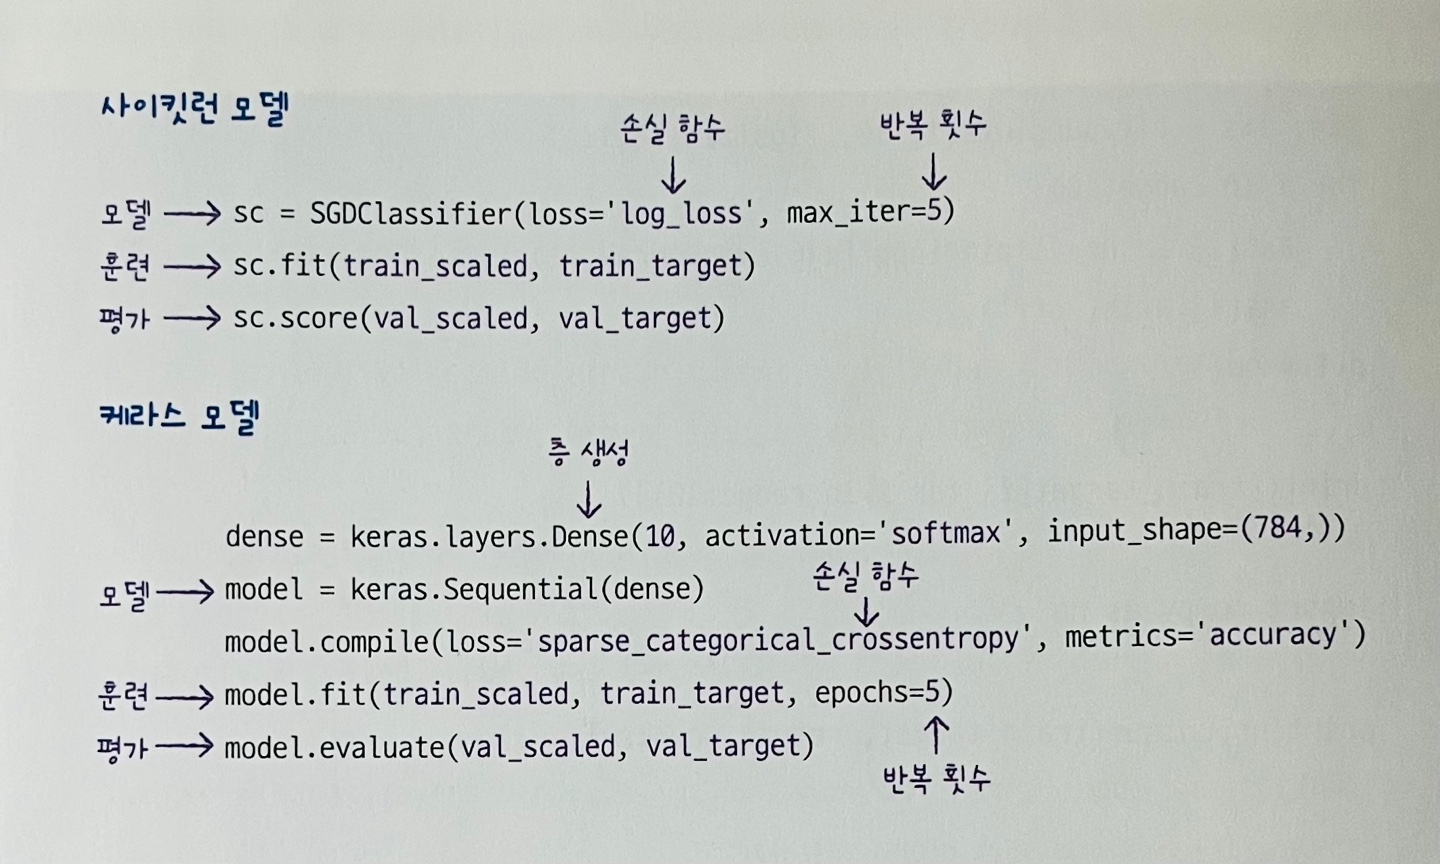

Epoch는 훈련 횟수이고 밑에 있는 1500은 미니배치의 수

48000개의 샘플을 한 번에 모두 사용하여 훈련하기에는 시간이 많이 걸리므로, 32개씩 나누어서 총 1500번 훈련을 수행

즉. 이 예제에서는 총 1500*5번의 모델 매개변수 수정이 발생함

모델의 학습 속도를 높이고 계산량을 줄이면서도 전체 데이터셋에 대한 대표성을 유지할 수 있음